In [ ]:
import pandas as pd
# df1= pd.read_excel('idk2.xlsx', sheet_name= 'Sheet1')
df = pd.read_excel('final_df.xlsx')

In [ ]:
# df6 = pd.read_excel('idk2.xlsx', sheet_name= '6nl')
# frames = [df1, df6]
# df = pd.concat(frames)

# df.sort_values(by= 'Residue_Name' , ascending= True)
# df.reset_index(drop= True,inplace= True)
# df.to_excel('final_df.xlsx')

In [ ]:
df = df.drop_duplicates()
df = df.reset_index()
df

,index,Unnamed: 0,Time,Distance (nm),Name,Label,residue_num,Residue_Name
0,0,0,0,0.890427,ARG105-NZO,NZO,1,ARG105
1,1,1,100,0.915260,ARG105-NZO,NZO,1,ARG105
2,2,2,200,0.944242,ARG105-NZO,NZO,1,ARG105
3,3,3,300,0.862278,ARG105-NZO,NZO,1,ARG105
4,4,4,400,0.853040,ARG105-NZO,NZO,1,ARG105
...,...,...,...,...,...,...,...,...
16761,16761,16761,9600,0.799465,6NL-MET1,6NL,86,MET1
16762,16762,16762,9700,0.951515,6NL-MET1,6NL,86,MET1
16763,16763,16763,9800,0.863679,6NL-MET1,6NL,86,MET1
16764,16764,16764,9900,0.965626,6NL-MET1,6NL,86,MET1


In [ ]:
R_df = df['Residue_Name']
R_df = R_df.drop_duplicates()
R_df = R_df.sort_values()
R_df.reset_index(drop=True, inplace=True)
R_df = R_df.dropna()
R_df = pd.DataFrame(R_df)
R_df['residue_num'] = R_df.index + 1
R_df.to_excel('r_df2.xlsx')


In [ ]:

# Get unique residue names from the entire column
unique_residue_names = df['Residue_Name'].unique()

# Create mapping from residue names to integers
mapping = {name: i+1 for i, name in enumerate(unique_residue_names)}

# Update residue_num column based on the mapping
df['residue_num'] = df['Residue_Name'].map(mapping)

df = df.sort_values(by= 'residue_num')
df.reset_index(drop= True, inplace= True)
df = df.dropna()
df = df.drop_duplicates()
df


,index,Unnamed: 0,Time,Distance (nm),Name,Label,residue_num,Residue_Name
0,0,0,0,0.890427,ARG105-NZO,NZO,1,ARG105
1,6561,6561,9700,0.982795,6NL-ARG105,6NL,1,ARG105
2,6562,6562,9800,0.999187,6NL-ARG105,6NL,1,ARG105
3,6563,6563,9900,1.037291,6NL-ARG105,6NL,1,ARG105
4,6564,6564,10000,1.019936,6NL-ARG105,6NL,1,ARG105
...,...,...,...,...,...,...,...,...
16761,16636,16636,7200,1.285350,6NL-LYS96,6NL,116,LYS96
16762,16637,16637,7300,1.210744,6NL-LYS96,6NL,116,LYS96
16763,16638,16638,7400,1.294743,6NL-LYS96,6NL,116,LYS96
16764,16640,16640,7600,1.169925,6NL-LYS96,6NL,116,LYS96


In [ ]:
new_df = df[['Distance (nm)','Label']]

In [ ]:
new_df

,Distance (nm),Label
0,0.890427,NZO
1,0.982795,6NL
2,0.999187,6NL
3,1.037291,6NL
4,1.019936,6NL
...,...,...
16761,1.285350,6NL
16762,1.210744,6NL
16763,1.294743,6NL
16764,1.169925,6NL


In [ ]:
dist_dict = {}

# Define variables f_1, f_2, ..., f_69 using dictionary comprehension
for x in range(1, 116):
   dist_dict[f'f_{x}'] = new_df['Distance (nm)'][df['residue_num'] == x]
   dist_dict[f'f_{x}'].reset_index(drop=True, inplace=True)
   filtered_columns = pd.DataFrame(dist_dict)

In [ ]:
dist_df = pd.DataFrame(dist_dict)
dist_df['Label'] = df['Label']
# dist_df.to_excel('dist_df2.xlsx')
dist_df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,Label
0,0.890427,1.758574,1.592636,1.979052,1.613358,0.744173,2.404435,2.559567,1.312752,1.932388,...,1.757873,2.264788,1.425925,2.772762,1.574033,2.736173,3.756054,2.727184,2.542409,NZO
1,0.982795,1.700712,1.592871,2.332811,1.314728,0.749929,2.529630,2.073210,1.348997,1.810978,...,1.864005,2.264961,1.361468,2.831506,1.583588,2.662424,3.586293,2.805871,2.688995,6NL
2,0.999187,1.721074,1.635596,2.412004,1.352625,0.806219,2.429423,2.642362,1.291821,1.586449,...,1.760427,2.153133,1.427803,2.773155,1.695361,2.854114,3.596534,2.899338,2.658331,6NL
3,1.037291,1.680015,1.664234,2.361647,1.302817,0.857496,2.277805,2.633716,1.306200,1.625603,...,1.757711,2.257546,1.544973,2.788487,1.638248,2.786158,3.503220,2.805544,2.595881,6NL
4,1.019936,1.624383,1.563155,2.387435,1.495562,0.767386,2.367528,2.645001,1.315312,1.544423,...,1.916613,2.138681,1.630137,2.769342,1.664556,2.920212,3.706677,2.903453,2.654167,6NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.206559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NZO
299,1.185451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NZO
300,1.129257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NZO
301,1.178361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NZO


In [ ]:
dist_df = pd.read_excel('dist_df2.xlsx')
dist_df = dist_df.dropna(axis= 1)
dist_df


,f_1,f_2,f_3,f_5,f_6,f_7,f_8,f_9,f_10,f_11,...,f_54,f_55,f_56,f_57,f_58,f_60,f_61,f_62,f_63,Label
0,0.890427,1.758574,1.592636,1.613358,0.744173,2.404435,2.559567,1.312752,1.932388,2.354959,...,3.028749,2.706054,4.148130,2.682061,0.187633,1.474627,2.844684,4.499922,0.842886,NZO
1,0.982795,1.700712,1.592871,1.314728,0.749929,2.529630,2.073210,1.348997,1.810978,2.390159,...,2.188831,2.842243,3.964914,2.476299,0.166138,1.208813,2.842154,4.523483,0.917236,6NL
2,0.999187,1.721074,1.635596,1.352625,0.806219,2.429423,2.642362,1.291821,1.586449,2.413688,...,3.114079,2.693754,4.021492,2.575204,0.197086,1.987640,2.848908,4.538005,0.949135,6NL
3,1.037291,1.680015,1.664234,1.302817,0.857496,2.277805,2.633716,1.306200,1.625603,2.462470,...,3.134572,2.742604,3.998205,2.540620,0.162061,1.438654,2.926935,4.478117,0.937453,6NL
4,1.019936,1.624383,1.563155,1.495562,0.767386,2.367528,2.645001,1.315312,1.544423,2.358911,...,3.098037,2.849117,3.430442,2.543558,0.217306,2.110297,2.873983,4.566649,0.851719,6NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.482040,2.189003,2.333172,0.986867,1.540307,3.046041,1.707208,1.630296,1.386810,2.276269,...,2.770671,3.216819,3.326997,2.811380,0.389494,1.606319,3.740268,5.556413,1.143536,NZO
196,1.550959,2.154668,2.248513,0.942495,1.569658,3.142234,1.707492,1.455919,1.546238,2.277169,...,2.822716,3.232418,3.447283,2.788280,0.311546,1.536251,3.631060,5.505451,1.214821,NZO
197,1.548262,1.632986,2.310811,0.950757,0.903541,3.098581,1.645485,1.329098,1.398545,2.301357,...,2.799500,3.228603,3.370762,2.806041,0.457277,1.405753,3.683543,5.462814,1.209551,NZO
198,1.508460,1.594543,2.433838,0.867796,1.466502,3.276674,1.642683,1.459915,1.505735,2.146127,...,2.736116,3.127078,3.400988,2.813504,0.370536,1.591337,3.734180,5.522344,1.021378,NZO


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [ ]:
selected_features = dist_df.drop('Label' , axis = 1)
Target = dist_df['Label']

In [ ]:
X = selected_features
y = Target


In [ ]:
# Encode target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

In [ ]:
# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")



Validation Accuracy: 1.0000


In [ ]:
# Confusion matrix on validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix (Validation Set):\n", conf_matrix_val)


Confusion Matrix (Validation Set):
 [[11  0]
 [ 0  9]]


In [ ]:
# feature importances
feature_importances = rf_classifier.feature_importances_

In [ ]:
# feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
   Feature  Importance
0      f_1    0.239617
43    f_56    0.127298
21    f_27    0.116198
3      f_5    0.042489
2      f_3    0.037977
31    f_42    0.026661
37    f_48    0.022888
39    f_52    0.022673
41    f_54    0.020926
45    f_58    0.020506
30    f_38    0.015208
28    f_35    0.015165
17    f_22    0.014474
18    f_23    0.013435
4      f_6    0.012827
10    f_12    0.012681
48    f_62    0.012653
47    f_61    0.012111
25    f_32    0.012040
35    f_46    0.011587
24    f_30    0.011374
22    f_28    0.011063
42    f_55    0.010526
40    f_53    0.010167
20    f_25    0.009944
5      f_7    0.009807
15    f_20    0.009490
36    f_47    0.009485
13    f_17    0.008492
8     f_10    0.007763
7      f_9    0.007279
34    f_45    0.006834
6      f_8    0.006814
27    f_34    0.006766
23    f_29    0.006341
12    f_14    0.006285
38    f_51    0.006164
14    f_18    0.004783
33    f_44    0.004708
9     f_11    0.004491
32    f_43    0.004382
1      f_2   

In [ ]:
import pandas as pd

# Assuming you already have the feature_importance_df DataFrame
# feature_importance_df = your_data_frame_here

# Filter the rows with importance >= 0.02
filtered_df = feature_importance_df[feature_importance_df['Importance'] >= 0.02]
filtered_df





,Feature,Importance
0,f_1,0.239617
43,f_56,0.127298
21,f_27,0.116198
3,f_5,0.042489
2,f_3,0.037977
31,f_42,0.026661
37,f_48,0.022888
39,f_52,0.022673
41,f_54,0.020926
45,f_58,0.020506


In [ ]:
# Total normalized feature importance across all trees
total_normalized_importance = sum(feature_importances)
print(f"Total Normalized Importance: {total_normalized_importance:.4f}")

Total Normalized Importance: 1.0000


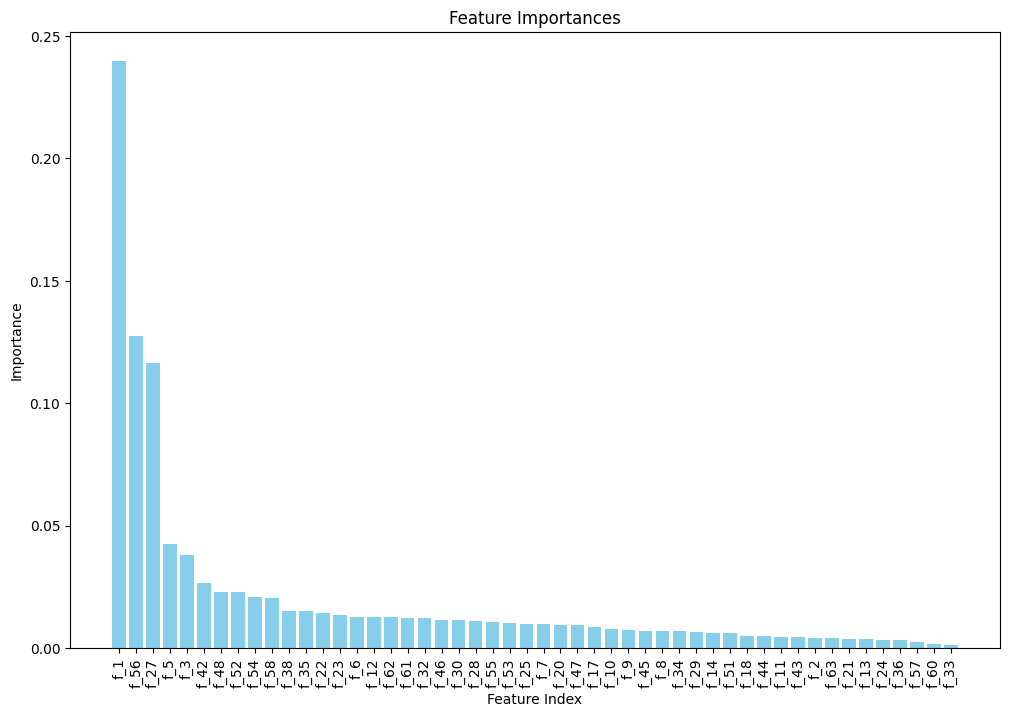

In [ ]:
import matplotlib.pyplot as plt

features = feature_importance_df['Feature']
importances = feature_importance_df['Importance']
bar_width = 0.01
#  bar plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(features)), importances, align='center', color='skyblue')
plt.xticks(range(len(features)), features, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
# filteredsort_df.to_excel('f_imp.xlsx')
filteredsort_df

,Feature,Importance
0,f_1,0.239617
2,f_3,0.037977
3,f_5,0.042489
21,f_27,0.116198
31,f_42,0.026661
37,f_48,0.022888
39,f_52,0.022673
41,f_54,0.020926
43,f_56,0.127298
45,f_58,0.020506
